# Exploratory Data Analysis of the Diabetes Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient

%matplotlib inline

## Establish handle to the Azure ML Workspace

In [2]:
try:
    credential = DefaultAzureCredential()
    
    # Load ML client from config
    ml_client = MLClient.from_config(credential)
    print("✅ Successfully connected to Azure ML workspace:", ml_client.workspace_name)
except Exception as e:
    print(f"❌ Error connecting to Azure ML: {e}")
    raise

Found the config file in: /config.json


✅ Successfully connected to Azure ML workspace: mlw-jpb-aml-core


## Load the diabetes dataset

Description of data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- **Pregnancies**: How many times a patient has been pregnant.
- **PlasmaGlucose**: A measure of the patient's blood sugar level after consuming glucose.
- **DiastolicBloodPressure**: The patient's blood pressure reading, specifically the pressure in the arteries when the heart is at rest. (mm Hg)
- **TricepsThickness**: Thickness of the skinfold on the triceps (mm).
- **SerumInsulin**: The level of insulin in the patient's blood after a 2-hour period. ((mu U/ml))
- **BMI**: The patient's Body Mass Index, which is a measure of body fat based on height and weight.
- **DiabetesPedigree**: Measure of the patient's likelihood of having diabetes based on their family history of the disease.
- **Age**: Age of the patient in years.
- **Diabetic**: Indicates whether the patient has diabetes or not. A value of 1 means they have diabetes, while 0 means they don't.

In [3]:
try:
    # Get the latest version of the diabetes dataset
    versions = list(ml_client.data.list(name="diabetes-diagnostics"))
    latest_version = max(int(version.version) for version in versions)
    
    # Get the data asset
    data_asset = ml_client.data.get(name="diabetes-diagnostics", version=latest_version)
    
    # Load the data into a pandas DataFrame
    df = pd.read_csv(data_asset.path)
    
    print(f"✅ Successfully loaded diabetes dataset (version {latest_version})")
    print(f"   Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"❌ Error loading diabetes dataset: {e}")
    raise

✅ Successfully loaded diabetes dataset (version 6)
   Dataset shape: (15000, 10)


## Basic dataset insight

In [4]:
df.head(10)

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   
5    1619297            0             82                      92   
6    1660149            0            133                      47   
7    1458769            0             67                      87   
8    1201647            8             80                      95   
9    1403912            1             72                      31   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  
5                 9           253  19.724160          0.103424   26         0  
6                19           227  21.941357          0.174160   21         0  
7                43            36  18.277723          0.236165   26         0  
8                33            24  26.624929          0.443947   53         1  
9                40            42  36.889576          0.103944   26         0

In [5]:
df.describe()

PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000     14.000000     18.200512          0.078044   
25%           15.000000     39.000000     21.259887          0.137743   
50%           31.000000     83.000000     31.767940          0.200297   
75%           41.000000    195.000000     39.259692          0.616285   
max           93.000000    799.000000     56.034628          2.301594   

                Age      Diabetic  
count  15000.000000  15000.000000  
mean      30.137733      0.333333  
std       12.089703      0.471420  
min       21.000000      0.000000  
25%       22.000000      0.000000  
50%       24.000000      0.000000  
75%       35.000000      1.000000  
max       77.000000      1.000000

In [6]:
df.duplicated().sum() 

0

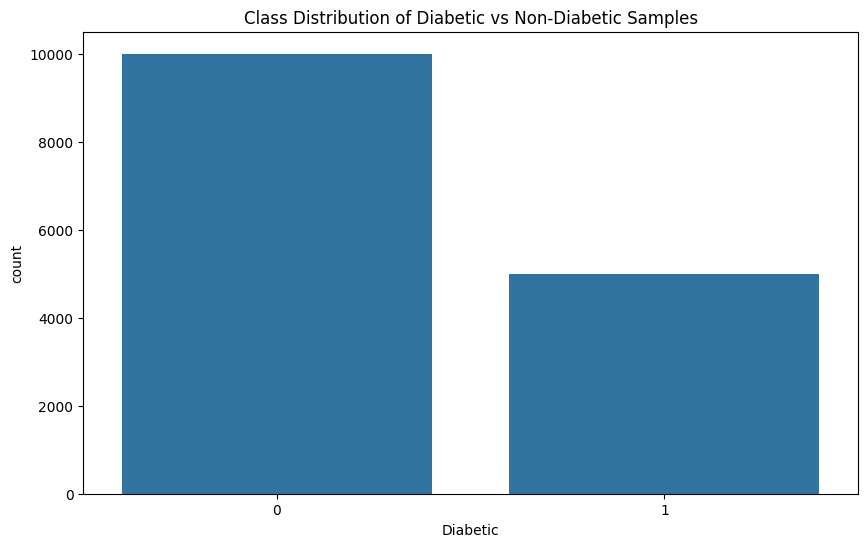

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetic', data=df)
plt.title('Class Distribution of Diabetic vs Non-Diabetic Samples')
plt.show()

## Visualise each feature distribution

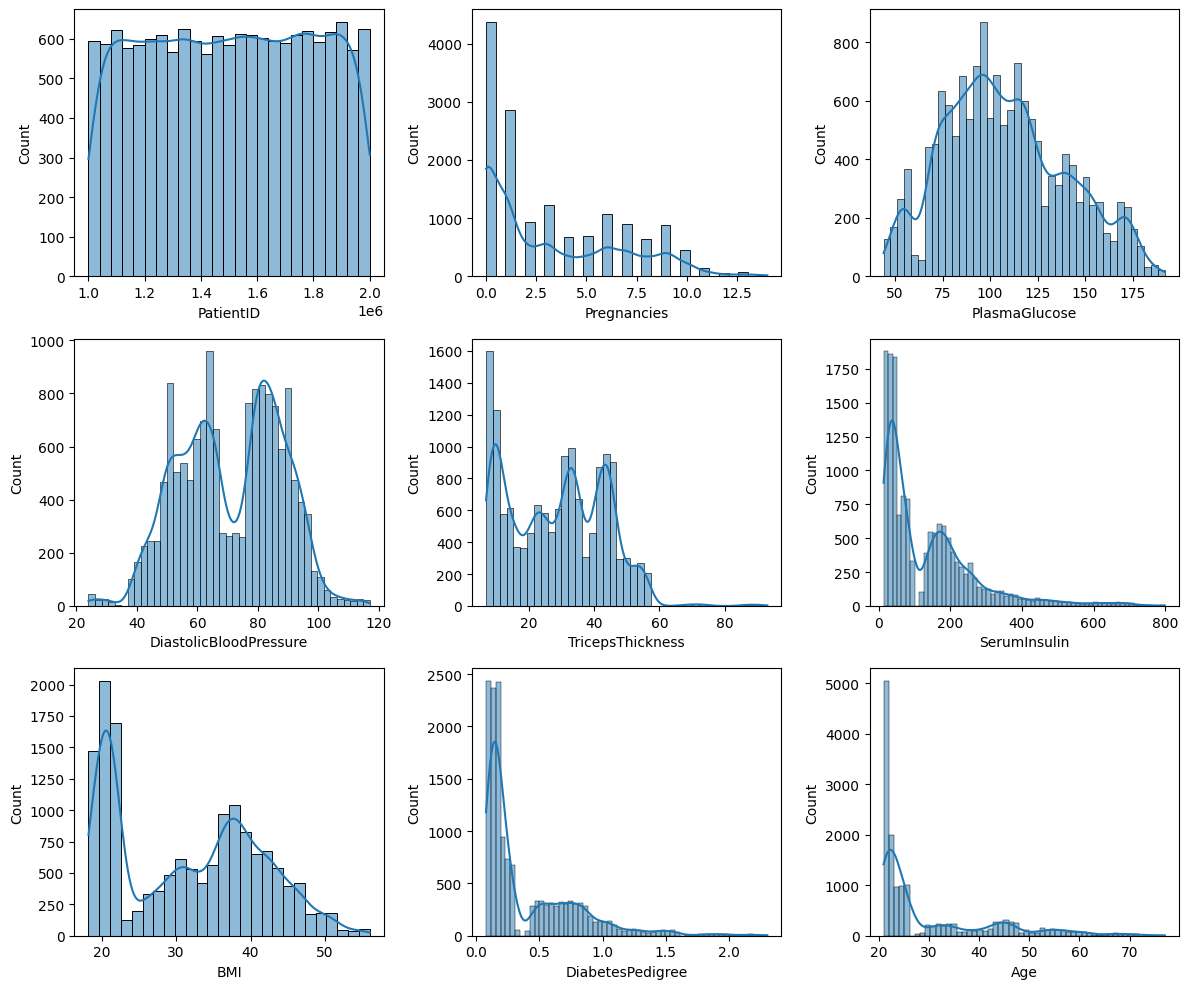

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Iterate over each feature and plot
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    sns.histplot(data=df, x=col, ax=ax,kde=True)

fig.tight_layout() # Adjust the spacing between subplots
plt.show()

## Visualise distribution and outliers with boxplots

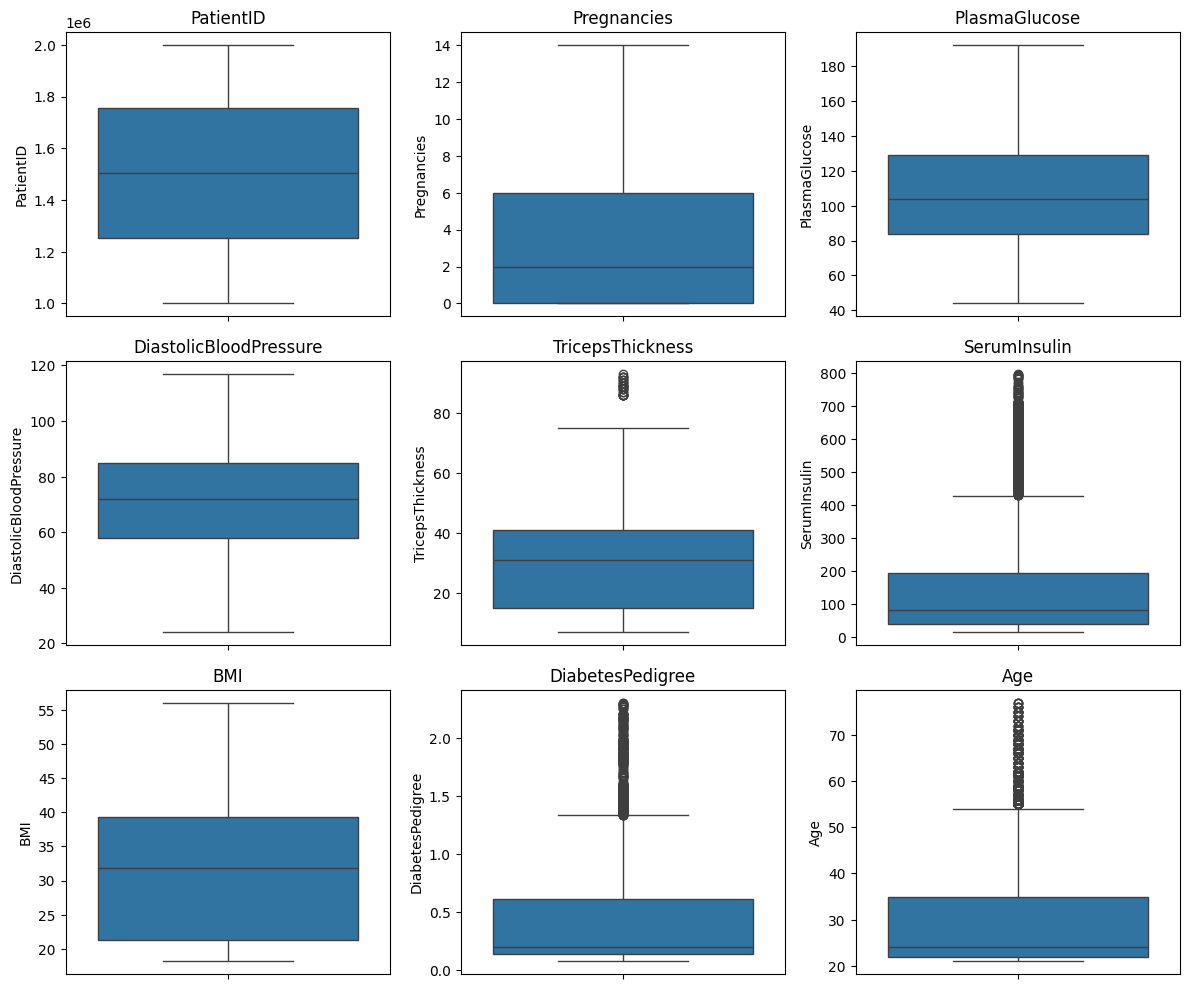

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns, axes)):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)

fig.tight_layout()
plt.show()

## Visualise density plots that shows feature distribution, with different colored areas representing diabetic vs non-diabetic patients 

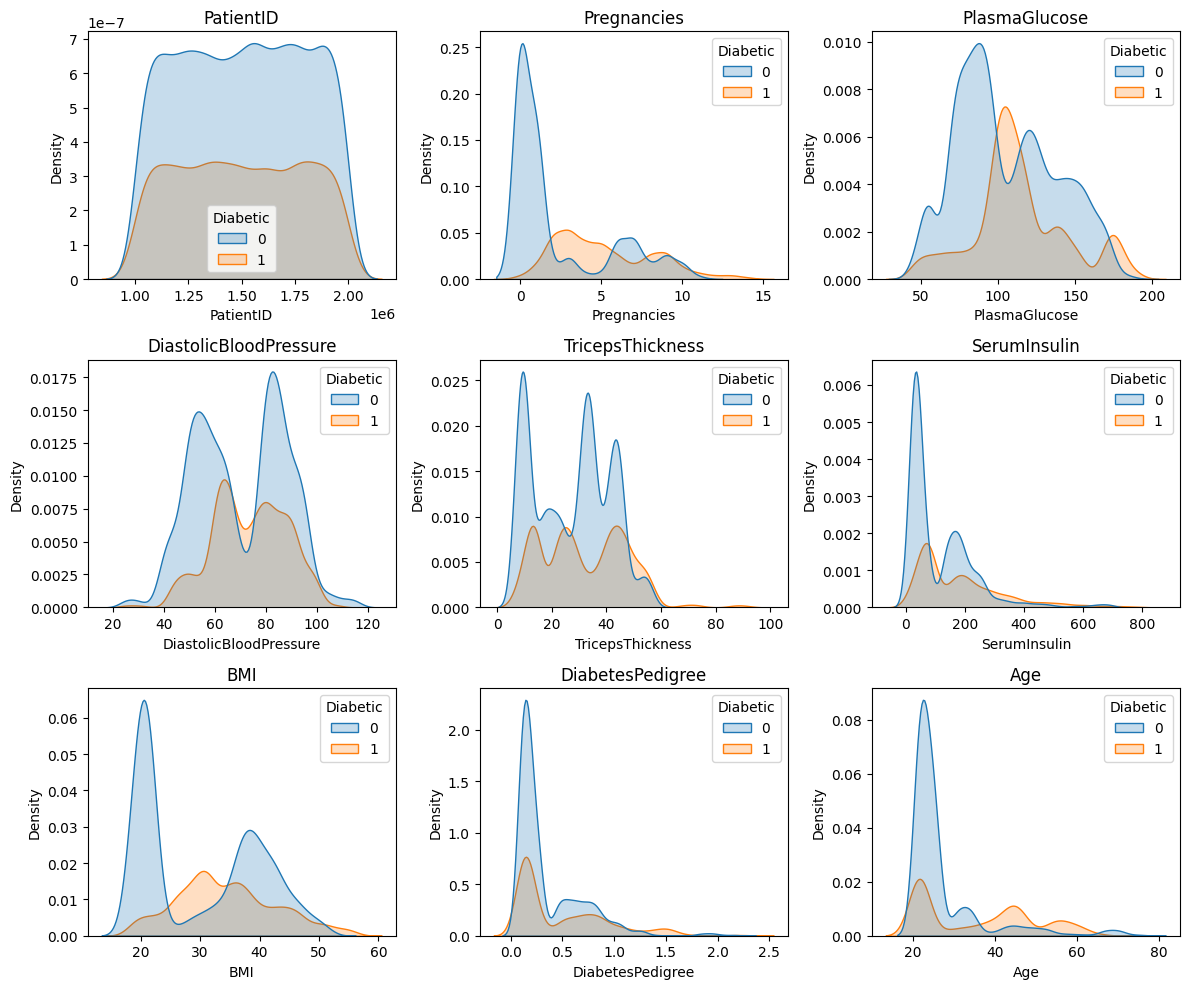

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns, axes)):
    sns.kdeplot(data=df, x=col, hue='Diabetic', fill=True, ax=ax)
    ax.set_title(col)

fig.tight_layout()
plt.show()

## Pairwise visualization of the relationships between diabetes and the other features. Scatter plot the relationships to see how they differ between the diabetic and non-diabetic groups

<Figure size 2000x1500 with 0 Axes>

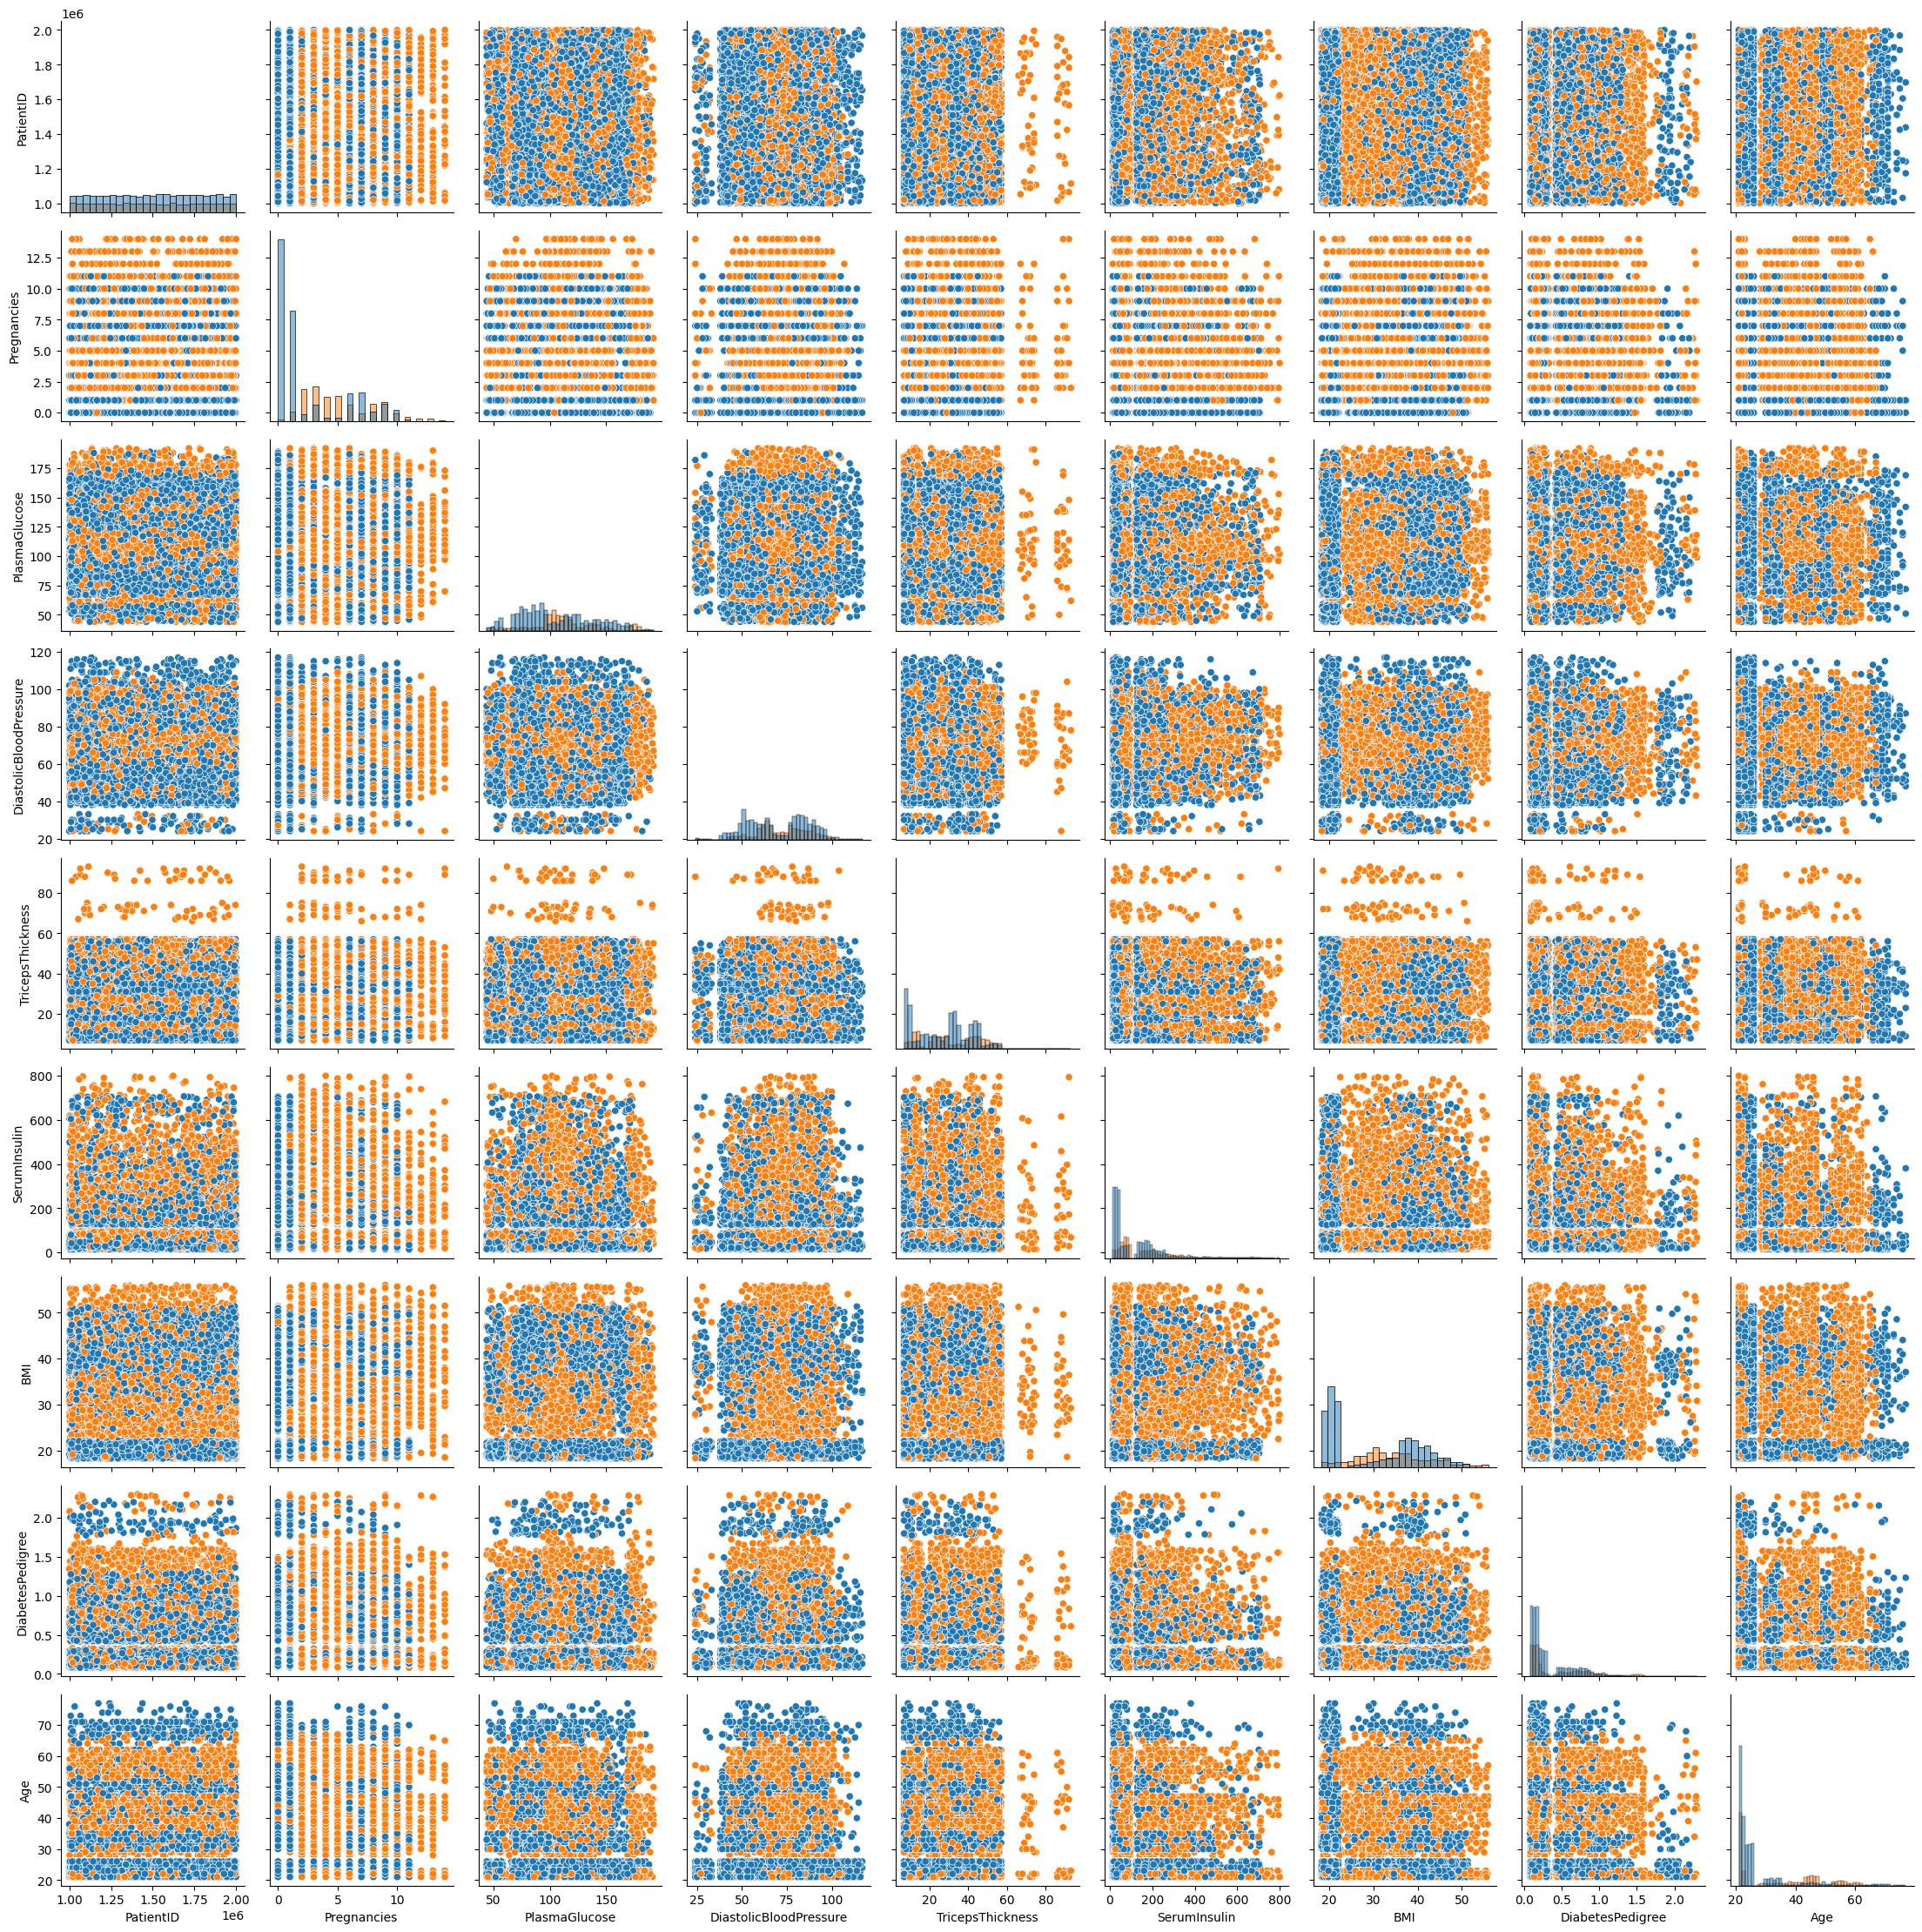

In [11]:
plt.figure(figsize=(20,15))
g = sns.PairGrid(data = df, hue='Diabetic')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)